In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [12]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [15]:
df.duplicated().sum()

0

In [16]:
df.drop(columns=['Serial No.'], inplace=True)

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [19]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [22]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
158,306,106,2,2.0,2.5,8.14,0
142,331,115,5,4.0,3.5,9.44,1
110,305,108,5,3.0,3.0,8.48,0
157,309,104,2,2.0,2.5,8.26,0
454,310,105,2,3.0,3.5,8.01,0
...,...,...,...,...,...,...,...
80,312,105,3,2.0,3.0,8.02,1
482,328,113,4,4.0,2.5,8.77,1
396,325,107,3,3.0,3.5,9.11,1
419,308,102,2,2.0,3.5,7.98,1


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
X_train_scaled

array([[0.32      , 0.48148148, 0.25      , ..., 0.375     , 0.42948718,
        0.        ],
       [0.82      , 0.81481481, 1.        , ..., 0.625     , 0.84615385,
        1.        ],
       [0.3       , 0.55555556, 1.        , ..., 0.5       , 0.53846154,
        0.        ],
       ...,
       [0.7       , 0.51851852, 0.5       , ..., 0.625     , 0.74038462,
        1.        ],
       [0.36      , 0.33333333, 0.25      , ..., 0.625     , 0.37820513,
        1.        ],
       [0.44      , 0.59259259, 0.25      , ..., 0.75      , 0.71153846,
        0.        ]])

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.8600 - val_loss: 0.6362
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5931 - val_loss: 0.4219
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3888 - val_loss: 0.2636
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2410 - val_loss: 0.1581
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1434 - val_loss: 0.0899
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0783 - val_loss: 0.0511
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0439 - val_loss: 0.0306
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - val_loss: 0.0210
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - val_loss: 0.0174
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - val_loss: 0.0162
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0156
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [30]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7450361310122371

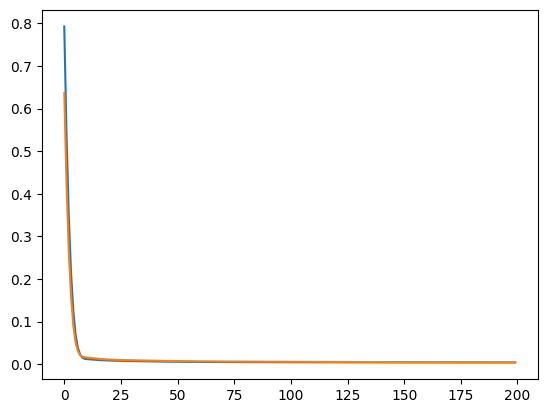

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])